In [49]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import scipy.io
import pandas as pd
import numpy as np
import sys
import os
import ast
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path+"/lib")

from get_dob import datenum_to_datetime
from get_face_array import save_array

In [50]:
mat_wiki = scipy.io.loadmat('./wiki_crop/wiki.mat')

In [51]:
columns = ["dob", "photo_taken", "full_path", "gender", "name", "face_location", 
           "face_score", "second_face_score", 'celeb_names', 'celeb_id']

In [52]:
instances_wiki = mat_wiki['wiki'][0][0][0].shape[1]

df_wiki = pd.DataFrame(index = range(0,instances_wiki), columns=columns)

In [53]:
for i in mat_wiki["wiki"]:
    current_array = i[0]
    for j in range(len(current_array)):
        df_wiki[columns[j]] = pd.DataFrame(current_array[j][0])

In [54]:
df_wiki.head()

,dob,photo_taken,full_path,gender,name,face_location,face_score,second_face_score,celeb_names,celeb_id
0,723671,2009,[17/10000217_1981-05-05_2009.jpg],1.0,[Sami Jauhojärvi],"[[111.29109473290997, 111.29109473290997, 252....",4.300962,NaN,NaN,NaN
1,703186,1964,[48/10000548_1925-04-04_1964.jpg],1.0,[Dettmar Cramer],"[[252.48330229530742, 126.68165114765371, 354....",2.645639,1.949248,NaN,NaN
2,711677,2008,[12/100012_1948-07-03_2008.jpg],1.0,[Marc Okrand],"[[113.52, 169.83999999999997, 366.08, 422.4]]",4.329329,NaN,NaN,NaN
3,705061,1961,[65/10001965_1930-05-23_1961.jpg],1.0,[Aleksandar Matanović],"[[1, 1, 634, 440]]",-inf,NaN,NaN,NaN
4,720044,2012,[16/10002116_1971-05-31_2012.jpg],0.0,[Diana Damrau],"[[171.61031405173117, 75.57451239763239, 266.7...",3.408442,NaN,NaN,NaN


In [55]:
df_wiki['dob'] = df_wiki['dob'].apply(datenum_to_datetime)
df_wiki['full_path'] = df_wiki['full_path'].str.get(0)

In [56]:
df_wiki.to_csv('wiki.csv', index=False)

In [57]:
save_array()

0/1
Done


In [58]:
test = pd.read_csv('./face_nparray.csv')
test[~test["face_nparray"].isna()]

,Unnamed: 0,dob,photo_taken,full_path,gender,name,face_location,face_score,second_face_score,celeb_names,celeb_id,face_nparray
7066,7066,1918,1950,60/21136460_1918-01-31_1950.jpg,0.0,['Michiyo Kogure'],[[ 65.57469135 49.40101852 210.2577469 194.0...,1.947913,NaN,NaN,NaN,"[[[14, 14, 14], [10, 10, 10], [10, 10, 10], [1..."


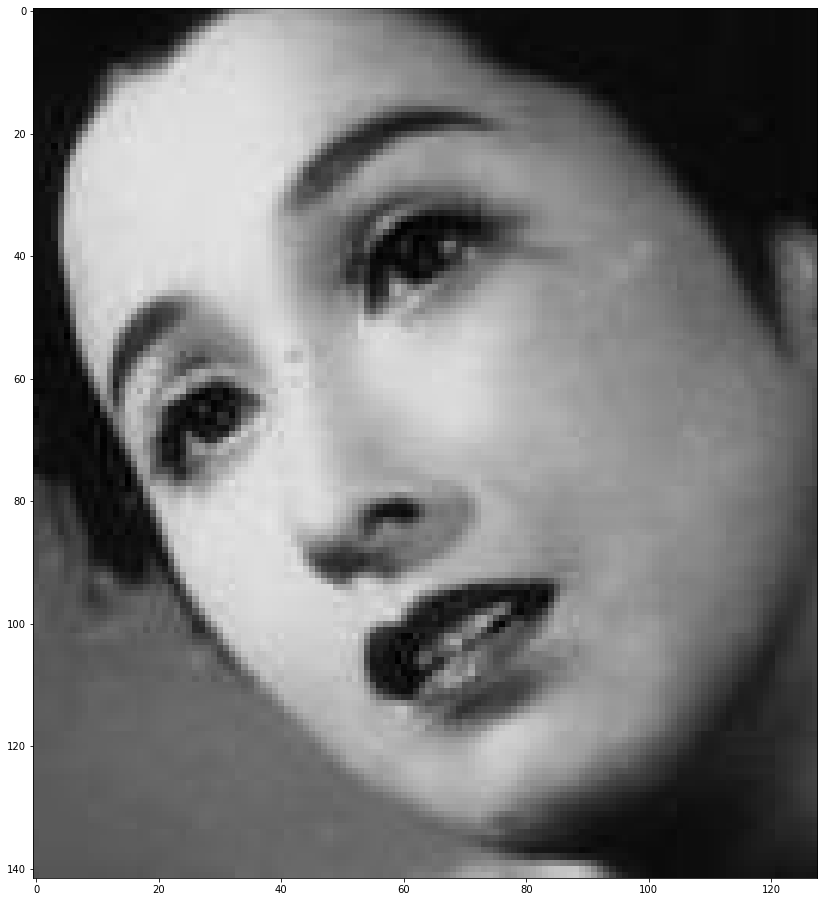

In [59]:
arr = ast.literal_eval(test[~test["face_nparray"].isna()]["face_nparray"][7066])
b = np.array(arr)

plt.figure(figsize=(16,16))
plt.imshow(b)
plt.show()